In [88]:
import pandas as pd
import numpy as np

In [89]:
spam_data = pd.read_csv('spam.csv')

In [90]:
spam_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [91]:
spam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [92]:
from sklearn.preprocessing import LabelEncoder

In [93]:
encoder = LabelEncoder()

In [94]:
spam_data['Category'] = encoder.fit_transform(spam_data['Category'])

In [95]:
spam_data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [96]:
spam_data.isnull().sum()

Category    0
Message     0
dtype: int64

In [97]:
spam_data.duplicated().sum()

415

In [98]:
spam_data.drop_duplicates(keep='first', inplace=True)

In [99]:
spam_data.duplicated().sum()

0

In [100]:
spam_data.shape

(5157, 2)

In [101]:
spam_data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [102]:
import matplotlib.pyplot as plt

In [103]:
import seaborn as sns

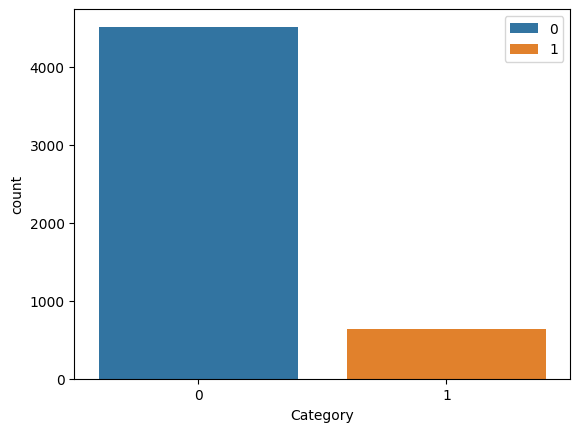

In [104]:
sns.countplot(x = spam_data['Category'],hue=spam_data['Category'])
plt.legend()

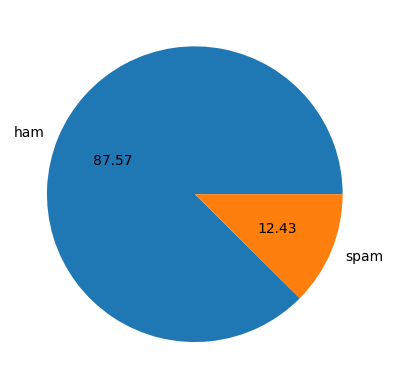

In [105]:
plt.pie(spam_data['Category'].value_counts(),labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

In [106]:
import nltk

In [107]:
spam_data['num_char'] = spam_data['Message'].apply(len)

In [108]:
spam_data.head()

,Category,Message,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [109]:
spam_data['num_words'] = spam_data['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [110]:
spam_data.head()

,Category,Message,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [111]:
spam_data['num_sent'] = spam_data['Message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [112]:
spam_data.head()

,Category,Message,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [113]:
spam_data[['Message', 'num_char', 'num_words', 'num_sent']].describe()

,num_char,num_words,num_sent
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [114]:
spam_data[spam_data['Category'] == 0][['Message', 'num_char', 'num_words', 'num_sent']].describe()

,num_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [115]:
spam_data[spam_data['Category'] == 1][['Message', 'num_char', 'num_words', 'num_sent']].describe()

,num_char,num_words,num_sent
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<Axes: xlabel='num_char', ylabel='Count'>

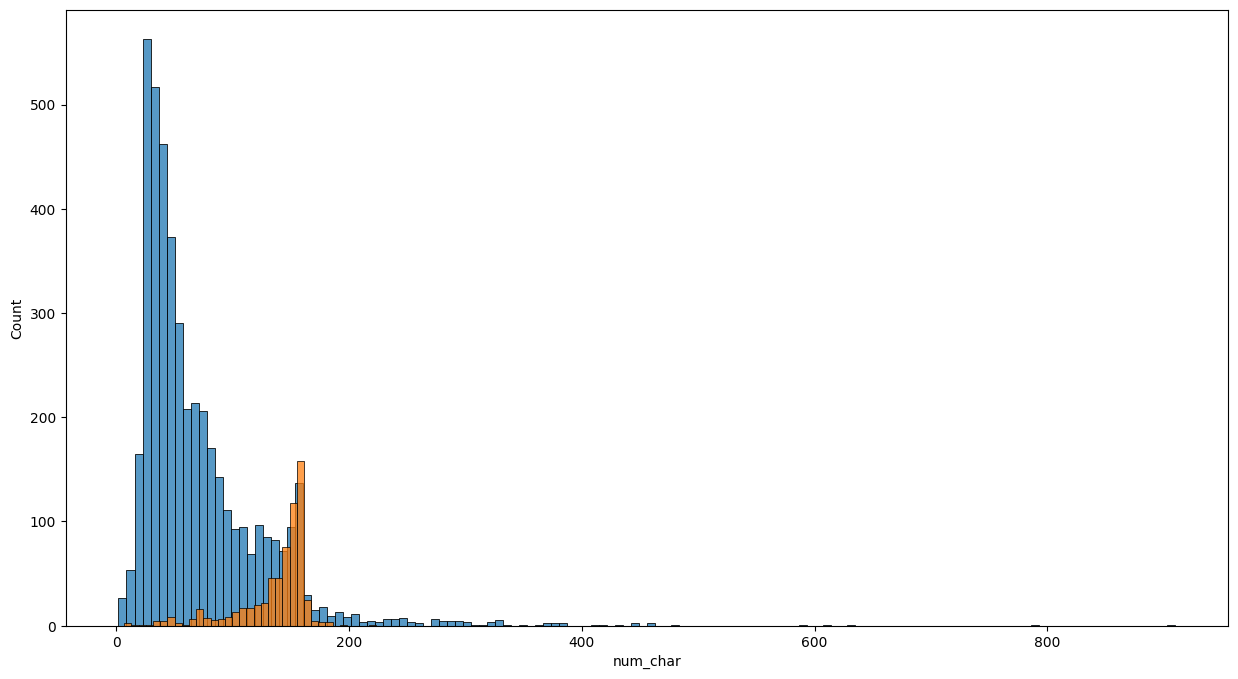

In [116]:
plt.figure(figsize=(15, 8))
sns.histplot(spam_data[spam_data['Category'] == 0]['num_char'])
sns.histplot(spam_data[spam_data['Category'] == 1]['num_char'])

<Axes: xlabel='num_words', ylabel='Count'>

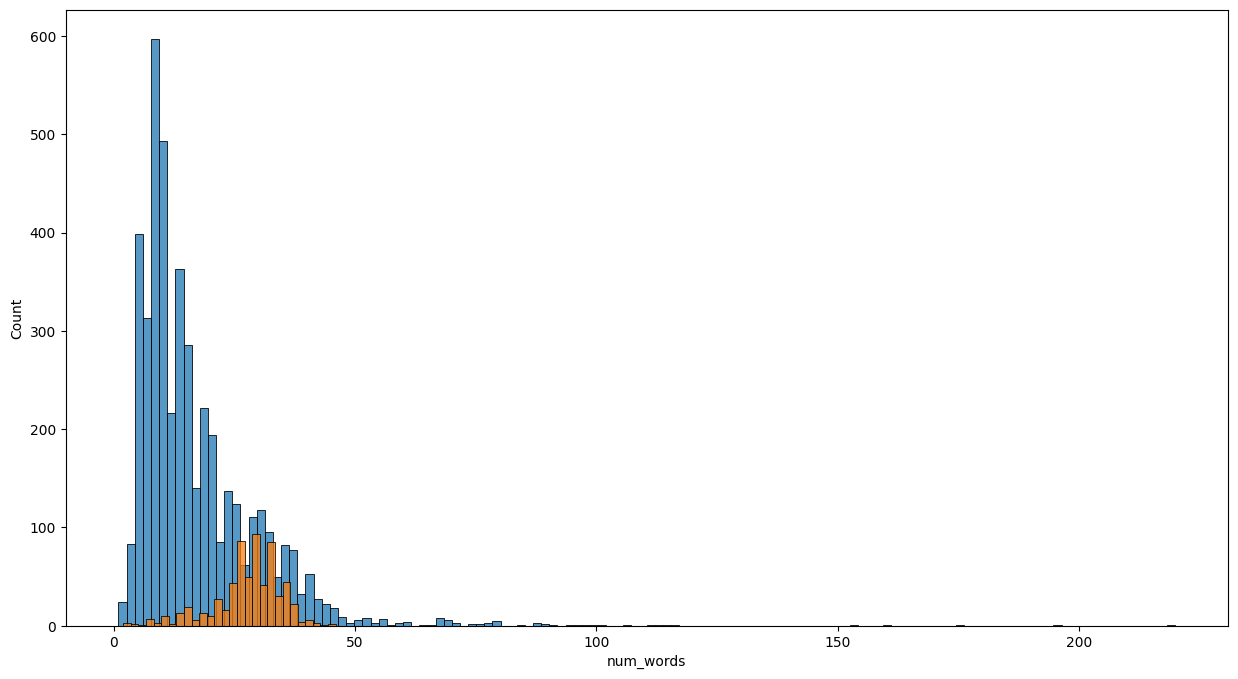

In [117]:
plt.figure(figsize=(15, 8))
sns.histplot(spam_data[spam_data['Category'] == 0]['num_words'])
sns.histplot(spam_data[spam_data['Category'] == 1]['num_words'])

<Axes: xlabel='num_sent', ylabel='Count'>

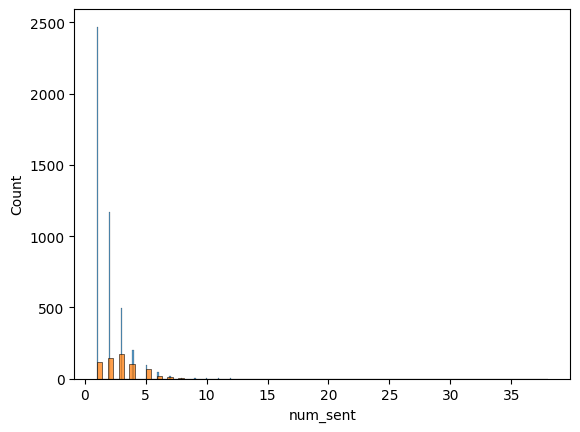

In [118]:
sns.histplot(spam_data[spam_data['Category'] == 0]['num_sent'])
sns.histplot(spam_data[spam_data['Category'] == 1]['num_sent'])

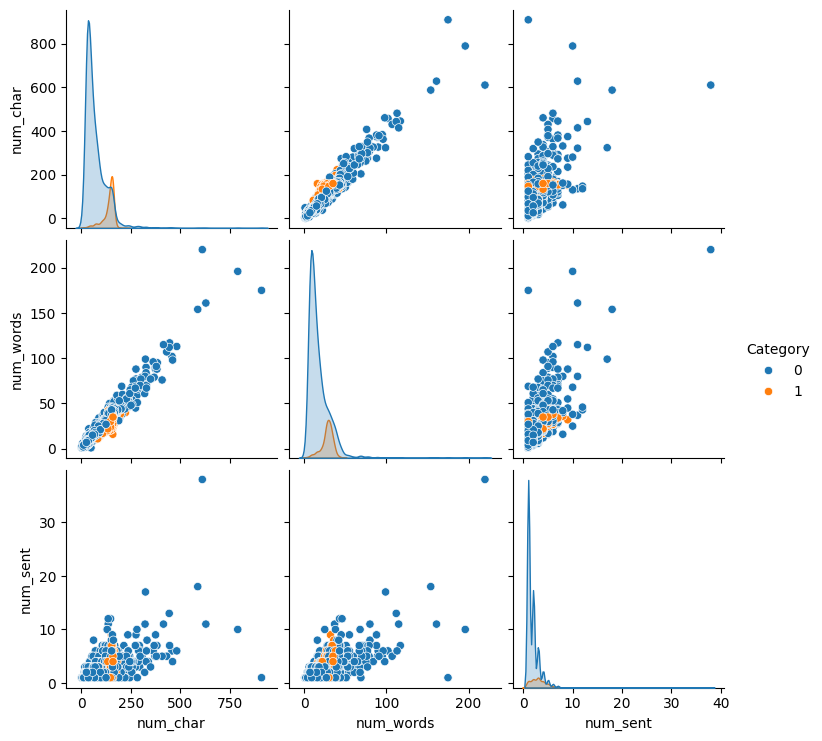

In [119]:
sns.pairplot(spam_data, hue='Category')

In [120]:
spam_data.corr(numeric_only=True)

,Category,num_char,num_words,num_sent
Category,1.000000,0.374409,0.255968,0.259023
num_char,0.374409,1.000000,0.966155,0.622428
num_words,0.255968,0.966155,1.000000,0.679396
num_sent,0.259023,0.622428,0.679396,1.000000


<Axes: >

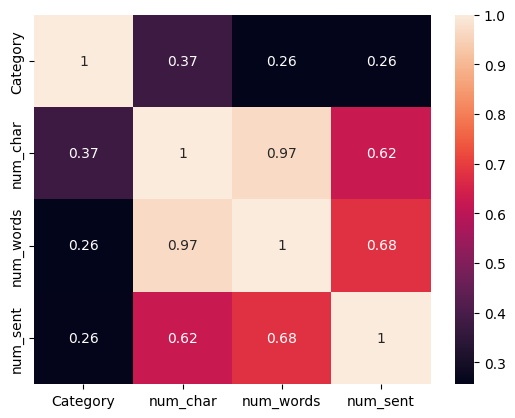

In [121]:
sns.heatmap(spam_data.corr(numeric_only=True), annot=True)

In [122]:
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer

In [123]:
stopwords_set = set(stopwords.words('english'))
ps = PorterStemmer()

In [124]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [i for i in text if i.isalnum()]
    text = [word for word in text if word not in stopwords_set and word not in string.punctuation]
    text = [ps.stem(word) for word in text]
    return " ".join(text)

In [125]:
transform_text(spam_data['Message'].iloc[0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [126]:
spam_data['tarnsformed_text'] = spam_data['Message'].apply(transform_text)

In [127]:
spam_data.head()

,Category,Message,num_char,num_words,num_sent,tarnsformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [128]:
from wordcloud import WordCloud

In [129]:
wc = WordCloud(width=800, height=800, min_font_size=10, background_color='white')

In [130]:
spam_wc = wc.generate(spam_data[spam_data['Category'] == 1]['tarnsformed_text'].str.cat(sep=" "))

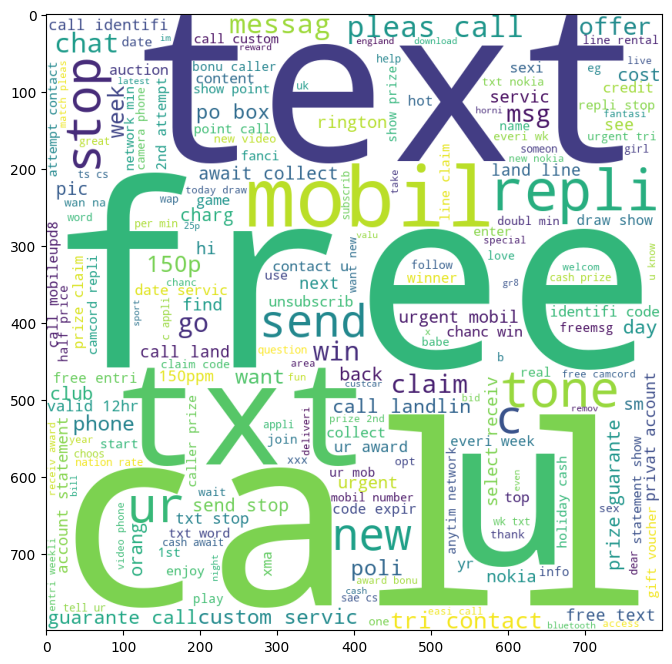

In [131]:
plt.figure(figsize=(15, 8))
plt.imshow(spam_wc)

In [132]:
ham_wc = wc.generate(spam_data[spam_data['Category'] == 0]['tarnsformed_text'].str.cat(sep=" "))

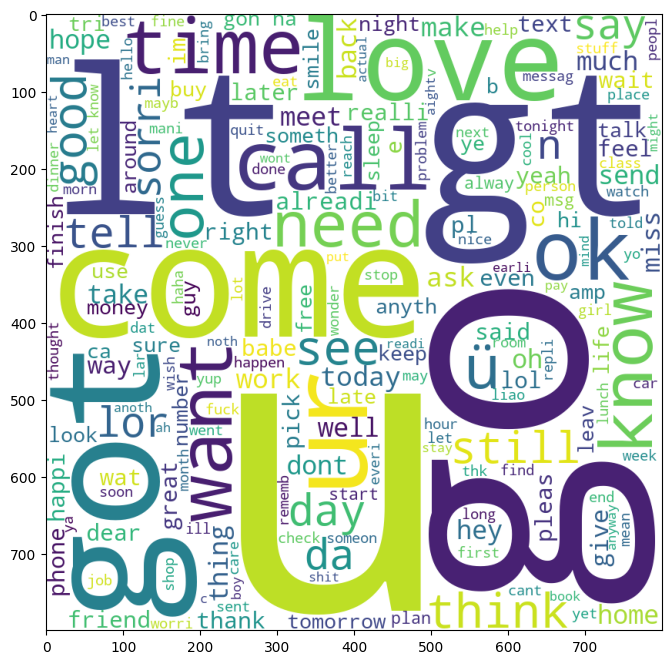

In [133]:
plt.figure(figsize=(15, 8))
plt.imshow(ham_wc)

In [134]:
lst = spam_data[spam_data['Category'] == 1]['tarnsformed_text'].tolist()

In [135]:
spam_corpus = [word for message in lst for word in message.split()]

In [136]:
len(spam_corpus)

9781

In [137]:
from collections import Counter
df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'frequency'])

In [138]:
df.head()

,Word,frequency
0,call,311
1,free,186
2,2,154
3,txt,139
4,text,122


In [139]:
sns. cubehelix_palette()

[[0.9312692223325372, 0.8201921796082118, 0.7971480974663592],
 [0.8559578605899612, 0.6418993116910497, 0.6754191211563135],
 [0.739734329496642, 0.4765280683170713, 0.5959617419736206],
 [0.57916573903086, 0.33934576125314425, 0.5219003947563425],
 [0.37894937987024996, 0.2224702044652721, 0.41140014301575434],
 [0.1750865648952205, 0.11840023306916837, 0.24215989137836502]]

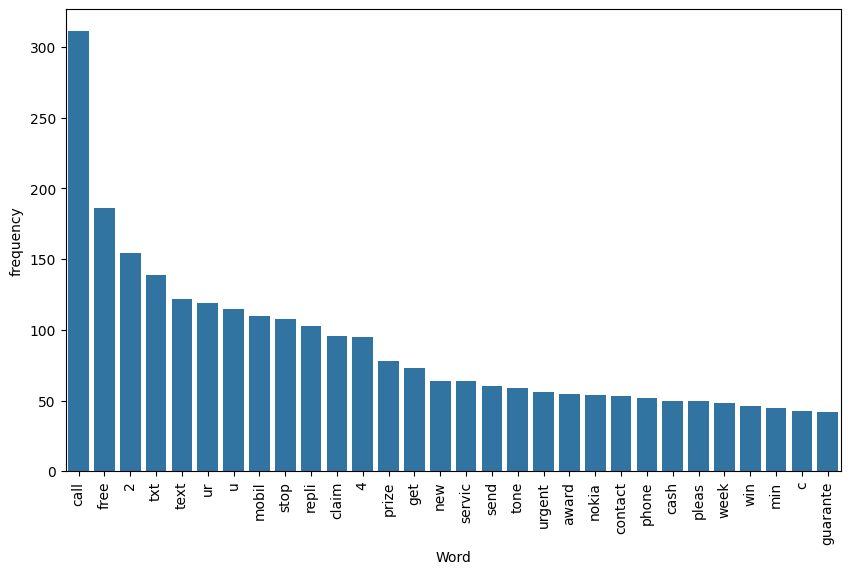

In [140]:
plt.figure(figsize=(10, 6))
sns.barplot(x = df['Word'], y =df['frequency'])
plt.xticks(rotation = 'vertical')
plt.show()

In [141]:
lst1 = spam_data[spam_data['Category'] == 0]['tarnsformed_text'].tolist()
lst1

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'even brother like speak treat like aid patent',
 'per request mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun',
 'gon na home soon want talk stuff anymor tonight k cri enough today',
 'search right word thank breather promis wont take help grant fulfil promis wonder bless time',
 'date sunday',
 'oh k watch',
 'eh u rememb 2 spell name ye v naughti make v wet',
 'fine way u feel way gota b',
 'serious spell name',
 'go tri 2 month ha ha joke',
 'ü pay first lar da stock comin',
 'aft finish lunch go str lor ard 3 smth lor u finish ur lunch alreadi',
 'ffffffffff alright way meet sooner',
 'forc eat slice realli hungri tho suck mark get worri know sick turn pizza lol',
 'lol alway convinc',
 'catch bu fri egg make tea eat mom left dinner feel love',
 'back am

In [142]:
ham_corpus = [word for message in lst1 for word in message.split()]

In [143]:
len(ham_corpus)

35940

In [144]:
df1 = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'frequency'])

In [145]:
df1.head()

,Word,frequency
0,u,897
1,go,407
2,get,351
3,2,288
4,gt,288


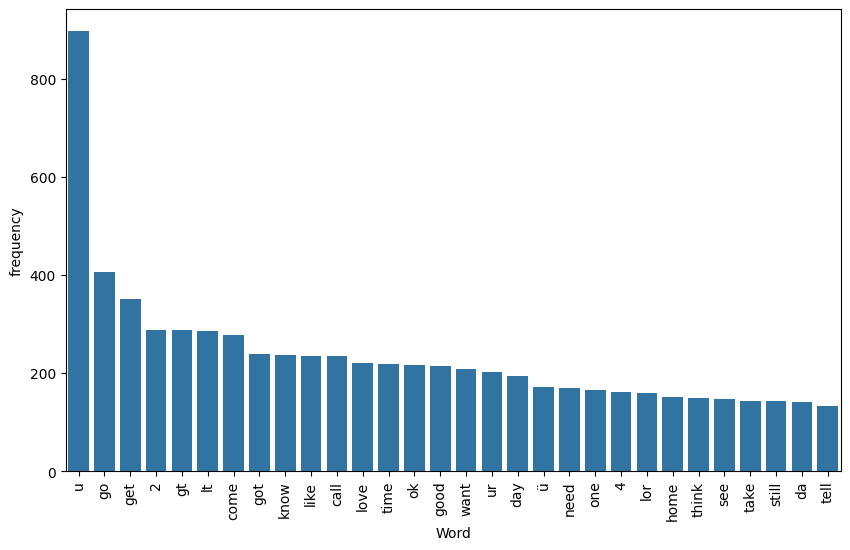

In [146]:
plt.figure(figsize=(10, 6))
sns.barplot(x = df1['Word'], y =df1['frequency'])
plt.xticks(rotation = 'vertical')
plt.show()

In [147]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [198]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [199]:
X = tfidf.fit_transform(spam_data['tarnsformed_text']).toarray()

In [200]:
X.shape

(5157, 3000)

In [201]:
y = spam_data['Category'].values

In [202]:
from sklearn.model_selection import train_test_split

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [204]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [205]:
clf1 = GaussianNB()
clf2 = BernoulliNB()
clf3 = MultinomialNB()

In [206]:
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)

MultinomialNB()

In [207]:
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)
y_pred3 = clf3.predict(X_test)

In [208]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [209]:
print("GaussianNB")
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

GaussianNB
0.8817829457364341
[[789 107]
 [ 15 121]]
0.5307017543859649


In [210]:
print("BernoulliNB")
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

BernoulliNB
0.9854651162790697
[[894   2]
 [ 13 123]]
0.984


In [211]:
print("MultinomialNB")
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

MultinomialNB
0.9777131782945736
[[896   0]
 [ 23 113]]
1.0


In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier

In [169]:
svc = SVC(kernel='sigmoid', gamma=1.0)
mb = MultinomialNB()
# knc = KNeighborsClassifier(n_jobs=-1)
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
abc = AdaBoostClassifier(n_estimators=50, random_state=42)
bc = BaggingClassifier(n_estimators=50, random_state=42, n_jobs=-1)
etc = ExtraTreesClassifier(n_estimators=50, random_state=42, n_jobs=-1)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=42)
xgbt = XGBClassifier(n_estimators=50, random_state=42)

In [170]:
# knc.fit(X_train, y_train)
# pred = knc.predict(X_test)
# accuracy_score(y_test, pred)

In [171]:
clf =  {
    'SVC':svc,
    'MultinomialNB':mb,
    'DecisionTree':dtc,
    'LogisticRegression':lrc,
    'RandomForest':rfc,
    'AdaBoost':abc,
    'Bagging':bc,
    "ExtraTree":etc,
    'GradientBoosting':gbdt,
    'XGBoost':xgbt
}

In [172]:
clf

{'SVC': SVC(gamma=1.0, kernel='sigmoid'),
 'MultinomialNB': MultinomialNB(),
 'DecisionTree': DecisionTreeClassifier(max_depth=5),
 'LogisticRegression': LogisticRegression(penalty='l1', solver='liblinear'),
 'RandomForest': RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42),
 'AdaBoost': AdaBoostClassifier(random_state=42),
 'Bagging': BaggingClassifier(n_estimators=50, n_jobs=-1, random_state=42),
 'ExtraTree': ExtraTreesClassifier(n_estimators=50, n_jobs=-1, random_state=42),
 'GradientBoosting': GradientBoostingClassifier(n_estimators=50, random_state=42),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_ra

In [173]:
def train_model(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

In [174]:
accuracy_score1 = []
precision_score1 = []
for name, model in clf.items():
    current_accuracy_score , current_precision_score = train_model(model, X_train, X_test, y_train, y_test)
    print("For ", name)
    print("Accuracy: ", current_accuracy_score)
    print("Precision: ", current_precision_score)
    accuracy_score1.append(current_accuracy_score)
    precision_score1.append(current_precision_score)

For  SVC
Accuracy:  0.9718992248062015
Precision:  0.9495798319327731
For  MultinomialNB
Accuracy:  0.9631782945736435
Precision:  1.0
For  DecisionTree
Accuracy:  0.939922480620155
Precision:  0.8425925925925926
For  LogisticRegression
Accuracy:  0.9476744186046512
Precision:  0.8727272727272727
For  RandomForest
Accuracy:  0.9757751937984496
Precision:  0.9911504424778761
For  AdaBoost
Accuracy:  0.9670542635658915
Precision:  0.925
For  Bagging
Accuracy:  0.9641472868217055
Precision:  0.8666666666666667
For  ExtraTree
Accuracy:  0.9728682170542635
Precision:  0.95
For  GradientBoosting
Accuracy:  0.9544573643410853
Precision:  0.9405940594059405
For  XGBoost
Accuracy:  0.9709302325581395
Precision:  0.9274193548387096


In [175]:
performance_df = pd.DataFrame({'Algorithm':clf.keys(), 'Accuracy':accuracy_score1, "Precision":precision_score1})

In [183]:
performance_df.sort_values(by='Accuracy',ascending=False)

,Algorithm,Accuracy,Precision
4,RandomForest,0.975775,0.991150
7,ExtraTree,0.972868,0.950000
0,SVC,0.971899,0.949580
9,XGBoost,0.970930,0.927419
5,AdaBoost,0.967054,0.925000
6,Bagging,0.964147,0.866667
1,MultinomialNB,0.963178,1.000000
8,GradientBoosting,0.954457,0.940594
3,LogisticRegression,0.947674,0.872727
2,DecisionTree,0.939922,0.842593


In [184]:
performance_df.sort_values(by='Precision',ascending=False)

,Algorithm,Accuracy,Precision
1,MultinomialNB,0.963178,1.000000
4,RandomForest,0.975775,0.991150
7,ExtraTree,0.972868,0.950000
0,SVC,0.971899,0.949580
8,GradientBoosting,0.954457,0.940594
9,XGBoost,0.970930,0.927419
5,AdaBoost,0.967054,0.925000
3,LogisticRegression,0.947674,0.872727
6,Bagging,0.964147,0.866667
2,DecisionTree,0.939922,0.842593


In [192]:
performance_df1 = pd.melt(performance_df, id_vars= "Algorithm")

In [193]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.971899
1,MultinomialNB,Accuracy,0.963178
2,DecisionTree,Accuracy,0.939922
3,LogisticRegression,Accuracy,0.947674
4,RandomForest,Accuracy,0.975775
5,AdaBoost,Accuracy,0.967054
6,Bagging,Accuracy,0.964147
7,ExtraTree,Accuracy,0.972868
8,GradientBoosting,Accuracy,0.954457
9,XGBoost,Accuracy,0.970930


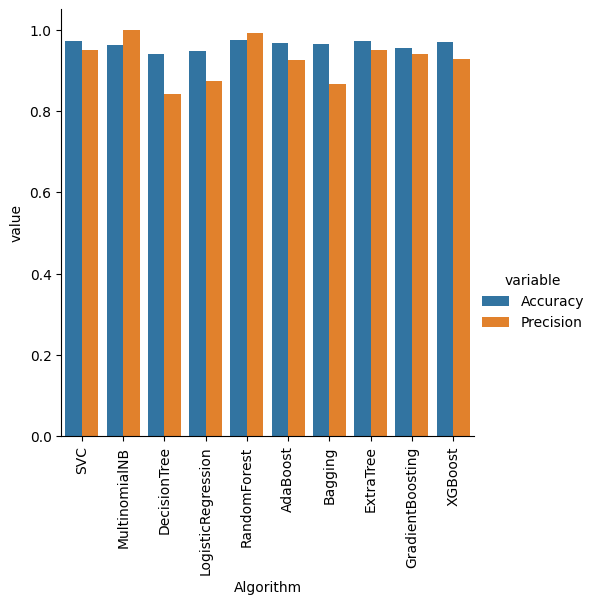

In [197]:
sns.catplot(x= 'Algorithm',y='value', hue = 'variable',data=performance_df1, kind='bar')
plt.xticks(rotation = 'vertical')
plt.show()